## RNN
Based on the closing price of the Apple stock on a daily basis, use RNN to predict its price. <br>
Data collected from:
https://sg.finance.yahoo.com/quote/AAPL/history?p=AAPL <br>
Train data is from Jan 1st 2016 to Jan 1st 2019 <br>
Test data is from Jan 1st 2019 to Jan 1st 2020 <br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Importing training set
dataset_train=pd.read_csv('AAPL.csv')
training_set=dataset_train.iloc[:,1:2].values

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

#Creating a data structure with 120 timesteps
X_train=[]
y_train=[]
for i in range(120,754):
    X_train.append(training_set_scaled[i-120:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

#Reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#initializing RNN
regressor = Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

#Compile
regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=100,batch_size=32)
regressor.save('Apple.h5')

Epoch 1/100
20/20 [==============================] - 3s 172ms/step - loss: 0.0610

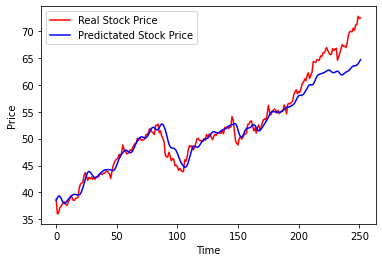

In [2]:
from keras.models import load_model

model=load_model('Apple.h5')
dataset_test=pd.read_csv('AAPL_test.csv')
test_set=dataset_test.iloc[:,1:2].values

dataset_total=pd.concat((dataset_train['Close'],dataset_test['Close']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-120:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(120,372):
    X_test.append(inputs[i-120:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regressor.predict(X_test)
pred = sc.inverse_transform(pred)

#Visualize
plt.plot(test_set,color='red',label='Real Stock Price')
plt.plot(pred,color='blue',label='Predictated Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
